# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

Before you start, install the some of the required packages. 

In [1]:
!python -m pip install kaggle==1.6.12

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install --target=/workspace ucimlrepo numpy==1.24.3

  Using cached ucimlrepo-0.0.7-py3-none-any.whl (8.0 kB)
  Using cached numpy-1.24.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Using cached certifi-2025.1.31-py3-none-any.whl (166 kB)
  Using cached pandas-2.2.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.1 MB)
  Using cached tzdata-2025.1-py2.py3-none-any.whl (346 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl (229 kB)
  Using cached pytz-2025.1-py2.py3-none-any.whl (507 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl (11 kB)


installing yahoo finance (yfinance) for calling API

In [3]:
!pip install yfinance

Defaulting to user installation because normal site-packages is not writeable


In [4]:
#import packages
import pandas as pd
import requests
from bs4 import BeautifulSoup
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

**Note:** Restart the kernel to use updated package(s).

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement
In 2-4 sentences, explain the kind of problem you want to look at and the datasets you will be wrangling for this project.

-  I want to analyze the relationship between stock market volatility and macroeconomic indicators. The first dataset will contain daily stock market index data (e.g. prices, trading volume). The second dataset will have macroeconomic indicators (e.g., GDP Growth). 

 
- Question 1: How does stock market performance (e.g., closing price, volume) correlate with GDP growth?
 
- Question 2: How does GDP growth in different countries (if available) influence the stock market performance of SPY?

Finding the right datasets can be time-consuming. Here we provide you with a list of websites to start with. But we encourage you to explore more websites and find the data that interests you.

* Google Dataset Search https://datasetsearch.research.google.com/
* The U.S. Government’s open data https://data.gov/
* UCI Machine Learning Repository https://archive.ics.uci.edu/ml/index.php


### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Programmatically downloading files
- Gather data by accessing APIs
- Gather and extract data from HTML files using BeautifulSoup
- Extract data from a SQL database

Each dataset must have at least two variables, and have greater than 500 data samples within each dataset.

For each dataset, briefly describe why you picked the dataset and the gathering method (2-3 full sentences), including the names and significance of the variables in the dataset. Show your work (e.g., if using an API to download the data, please include a snippet of your code). 

Load the dataset programmtically into this notebook.

#### **Dataset 1**  Macroeconomic Indicators

Type: *CSV FILE* 

Method: I manually downloaded a CSV file from the World Bank containing data on GDP growth

Dataset variables:

 Variable 1 
 - Country Name: The name of the country.
 -  Country Code: The 3-letter code representing the country.

 Variable 2 
 - Indicator Name: The name of the economic indicator (in this case, GDP growth).
 - Indicator Code: The unique code corresponding to the indicator (e.g., NY.GDP.MKTP.KD.ZG).




In [5]:
#FILL IN 1st data gathering and loading method

gdp_df = pd.read_csv('raw_gdp_growth.csv', header=2, delimiter=',', quotechar='"')
gdp_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.623626,1.719625,7.048533,2.397085,-2.232440,-26.211821,24.132627,8.517918,4.263719,NaN
1,Africa Eastern and Southern,AFE,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,0.468736,7.869709,5.622374,4.690458,5.159574,...,3.004937,2.194761,2.684543,2.666632,2.194319,-2.864293,4.576393,3.553878,2.320138,NaN
2,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,1.451315,2.260314,2.647003,1.189228,3.911603,-2.351101,-20.738839,-6.240172,2.710887,NaN
3,Africa Western and Central,AFW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,1.873054,3.712777,7.111968,5.413943,4.120855,...,2.720365,0.160782,2.289810,2.844755,3.232903,-1.003994,4.037630,3.789680,3.354733,NaN
4,Angola,AGO,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,0.943572,-2.580050,-0.147213,-1.316362,-0.702273,-5.638215,1.199211,3.044727,1.001289,NaN


#### Dataset 2 Stock Market Data

Type: API file

Method: API Access (Yahoo Finance API)

Dataset variables:

- Price: Adjusted closing price of SPY (S&P 500 ETF)
- Close: Closing price of SPY on the trading day
- High: Highest price reached during the trading day
- Low: Lowest price reached during the trading day
- Open: Opening price at the start of the trading day
- Volume: Number of shares traded on that day

In [6]:
#FILL IN 2nd data gathering and loading method

# Define the stock symbol and date range
stock_symbol = 'SPY'  # S&P 500 ETF as a proxy for the market
start_date = '1994-01-01'
end_date = '2024-01-01'

stock_data = yf.download(stock_symbol, start=start_date, end=end_date)
stock_data.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY
Date,,,,,
1994-01-03,26.590567,26.697859,26.554803,26.662095,960900
1994-01-04,26.697861,26.697861,26.590569,26.626333,164300
1994-01-05,26.751503,26.769385,26.626329,26.733621,710900
1994-01-06,26.751503,26.805149,26.715739,26.787267,201000
1994-01-07,26.912437,26.930319,26.733617,26.805145,775500


Optional data storing step: You may save your raw dataset files to the local data store before moving to the next step.

In [7]:
#Optional: store the raw data in your local data store

stock_data.to_csv('raw_stock_data_spy.csv', index=True)
print("Data saved")

Data saved


## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

- Quality Issues:
   
    1.) Data Quality Issues:

    2.) Inconsistent date formats between datasets

    3.) Duplicate records

    4.) Incorrectly formatted or unnecessary columns



- Tidiness Issues:

    1.) Stock Data Needs Reshaping:
   
    2.) GDP Data Contains Metadata Rows:

### **Tidiness Issues 1: Data Needs Reshaping**

In [8]:
#FILL IN - Inspecting the Stock dataframe visually
stock_data.head()

Price,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY
Date,,,,,
1994-01-03,26.590567,26.697859,26.554803,26.662095,960900
1994-01-04,26.697861,26.697861,26.590569,26.626333,164300
1994-01-05,26.751503,26.769385,26.626329,26.733621,710900
1994-01-06,26.751503,26.805149,26.715739,26.787267,201000
1994-01-07,26.912437,26.930319,26.733617,26.805145,775500


 - Issue and justification: The stock dataset contains an unnecessary row labeled "Ticker" (SPY) before the actual data. This will remove later. 


### **Tidiness Issues 2: GDP Data Contains Metadata Rows**


In [9]:
#FILL IN - Inspecting the GDP dataframe visually
gdp_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.623626,1.719625,7.048533,2.397085,-2.232440,-26.211821,24.132627,8.517918,4.263719,NaN
1,Africa Eastern and Southern,AFE,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,0.468736,7.869709,5.622374,4.690458,5.159574,...,3.004937,2.194761,2.684543,2.666632,2.194319,-2.864293,4.576393,3.553878,2.320138,NaN
2,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,1.451315,2.260314,2.647003,1.189228,3.911603,-2.351101,-20.738839,-6.240172,2.710887,NaN
3,Africa Western and Central,AFW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,1.873054,3.712777,7.111968,5.413943,4.120855,...,2.720365,0.160782,2.289810,2.844755,3.232903,-1.003994,4.037630,3.789680,3.354733,NaN
4,Angola,AGO,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,0.943572,-2.580050,-0.147213,-1.316362,-0.702273,-5.638215,1.199211,3.044727,1.001289,NaN


- Issue and justification: The GDP dataset is not structured in a proper tabular format.To make it more readable and suitable for analysis, we will reshape it using melt to convert it into a long format.





### Quality Issue 1: Missing values in both stock and GDP data


In [10]:
#FILL IN - Inspecting the missing value in stock data
stock_data.isnull().sum()

Price   Ticker
Close   SPY       0
High    SPY       0
Low     SPY       0
Open    SPY       0
Volume  SPY       0
dtype: int64

Issue: The isnull().sum() output appears to be incorrectly formatted, likely due to how the dataset is structured. The column labels might not be properly aligned, potentially causing issues when checking for missing values.

Justification:This misalignment may cause issues in merging, processing, or analyzing the data.


In [11]:
#FILL IN - Inspecting the missing value in GDP data
gdp_df.isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              266
                 ... 
2020                9
2021                9
2022               12
2023               23
Unnamed: 68       266
Length: 69, dtype: int64

Issue: The dataset has missing values in several columns, particularly in the years 1960, 2020, 2021, 2022, and 2023. The column "Unnamed: 68" also has a large number of missing values (266).

Justification: Unnamed: 68 Column: This column likely arises from extraneous or incorrectly formatted data, possibly from metadata or an extra header row during data extraction. It should be removed to avoid analysis issues.

### Quality Issue 2: Checking Data Format and Acceptable Ranges

In [12]:
#FILL IN - Inspecting the stock data type and summary statistics 
print(stock_data.dtypes)
print(stock_data.describe())

Price   Ticker
Close   SPY       float64
High    SPY       float64
Low     SPY       float64
Open    SPY       float64
Volume  SPY         int64
dtype: object
Price         Close         High          Low         Open        Volume
Ticker          SPY          SPY          SPY          SPY           SPY
count   7552.000000  7552.000000  7552.000000  7552.000000  7.552000e+03
mean     143.813356   144.659106   142.864765   143.801891  8.708829e+07
std      110.842151   111.423785   110.167082   110.813119  9.253646e+07
min       25.269163    25.341104    24.945430    24.945430  5.200000e+03
25%       72.478981    73.092077    71.759652    72.444830  1.347985e+07
50%       93.927670    94.555859    93.144773    93.864635  6.522945e+07
75%      181.789658   182.565569   181.315064   181.601070  1.189383e+08
max      470.652802   471.501895   470.228255   470.840398  8.710263e+08


Issue: The presence of "SPY" under each column suggests a multi-index problem, and the volume values appear excessively large, potentially indicating unit inconsistencies.

Justification: A multi-index can disrupt data operations, and volume values should be verified to ensure they are in the correct unit (e.g., thousands or millions).

In [13]:
#FILL IN - Inspecting the GDP data type and summary statistics
print(gdp_df.dtypes)
print(gdp_df.describe())

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2020              float64
2021              float64
2022              float64
2023              float64
Unnamed: 68       float64
Length: 69, dtype: object
       1960        1961        1962        1963        1964          1965  \
count   0.0  145.000000  152.000000  152.000000  152.000000  1.520000e+02   
mean    NaN    3.688285    5.306045    5.125705    6.356762  6.608480e+05   
std     NaN    5.739120    5.121014    5.679497    5.510490  8.147408e+06   
min     NaN  -27.270000  -19.685042  -12.278657  -12.464993 -1.248183e+01   
25%     NaN    1.395248    3.279305    3.281923    4.613358  3.428902e+00   
50%     NaN    4.399052    5.016082    5.012917    6.219990  5.473139e+00   
75%     NaN    6.168300    6.882735    7.059548    8.137611  7.732369e+00   
max     NaN   22.849095   32.524641   35.020377   45.071694  1.004480e+0

Issue: The GDP data appears to be improperly parsed, treating metadata like "World Development Indicators" and "Last Updated Date" as actual data columns.

Justification: Missing values are common in time-series data, especially in global datasets, and can be attributed to different countries reporting GDP at different times or inconsistencies in the data reporting system.

### Quality Issue 3: Identifying Duplicate Records

In [14]:
print(stock_data.duplicated().sum())  # Count duplicate rows
print(gdp_df.duplicated().sum())  # Check duplicate


0
0


Issue: Most of the columns related to GDP data (years from 1960 onwards) are of type float64, which makes sense for numerical analysis. However, the Country Name, Country Code, Indicator Name, and Indicator Code columns are of type object, which is appropriate since these are categorical data.

Justification: While duplicates are not present, other quality issues like incorrect indexing, missing values, or misformatted entries could still exist and require further validation

### Quality Issue 4: Identifying nunique value

In [15]:
#Identify nunique value

print(stock_data.nunique())
print(gdp_df.nunique())

Price   Ticker
Close   SPY       7212
High    SPY       7539
Low     SPY       7547
Open    SPY       7550
Volume  SPY       7510
dtype: int64
Country Name      266
Country Code      266
Indicator Name      1
Indicator Code      1
1960                0
                 ... 
2020              257
2021              256
2022              254
2023              243
Unnamed: 68         0
Length: 69, dtype: int64


Issues:
- Stock Data: The number of unique values for each column (e.g., "Close", "High", "Low", etc.) is 995 or 1006, which suggests that the data is primarily repeated for the same ticker "SPY", indicating a lack of diversity in tickers.
- GDP Data: The columns "Indicator Name" and "Indicator Code" have only 1 unique value, which suggests that the dataset may be limited to a single indicator, reducing the diversity of analysis.

Justification:
- Stock Data: The stock dataset is focused on a single ticker, "SPY", which is an ETF tracking the S&P 500 index. Thus, the lack of diversity in tickers is expected if only one ticker is being analyzed.
- GDP Data: The lack of diversity in "Indicator Name" and "Indicator Code" might indicate that the dataset is restricted to a single economic indicator (GDP), limiting the range of economic indicators available for analysis.

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [16]:
# FILL IN - Make copies of the datasets to ensure the raw dataframes 
# are not impacted
clean_stock_data = stock_data.copy()
clean_gdp_data = gdp_df.copy()

### **Quality Issue 1: Remove unnecessary row **

In [17]:
#Remove unnecessary row in stock data (e.g., row labeled "SPY")
clean_stock_data = clean_stock_data.dropna(how='all')  # Removing any rows with all NaN values

In [18]:
#Inspecting after cleaning
clean_stock_data.head()

Price,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY
Date,,,,,
1994-01-03,26.590567,26.697859,26.554803,26.662095,960900
1994-01-04,26.697861,26.697861,26.590569,26.626333,164300
1994-01-05,26.751503,26.769385,26.626329,26.733621,710900
1994-01-06,26.751503,26.805149,26.715739,26.787267,201000
1994-01-07,26.912437,26.930319,26.733617,26.805145,775500


Justification: The first row (labeled "SPY") is unnecessary as it repeats the ticker symbol across multiple columns, likely due to incorrect header parsing during data import. Removing it ensures the dataset has properly structured column names, improving data consistency and ease of analysis.

### **Quality Issue 2: Remove unnecessary columns **

In [19]:
#Remove extra columns from GDP data
clean_gdp_data = clean_gdp_data.drop(columns=['Unnamed: 68', 'Country Name', 'Indicator Name'])

In [20]:
#Inspecting after cleaning
clean_gdp_data.head()

,Country Code,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,ABW,NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.586575,-0.623626,1.719625,7.048533,2.397085,-2.232440,-26.211821,24.132627,8.517918,4.263719
1,AFE,NY.GDP.MKTP.KD.ZG,NaN,0.468736,7.869709,5.622374,4.690458,5.159574,4.822754,5.373502,...,3.992863,3.004937,2.194761,2.684543,2.666632,2.194319,-2.864293,4.576393,3.553878,2.320138
2,AFG,NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.724543,1.451315,2.260314,2.647003,1.189228,3.911603,-2.351101,-20.738839,-6.240172,2.710887
3,AFW,NY.GDP.MKTP.KD.ZG,NaN,1.873054,3.712777,7.111968,5.413943,4.120855,-1.517705,-9.043620,...,5.920023,2.720365,0.160782,2.289810,2.844755,3.232903,-1.003994,4.037630,3.789680,3.354733
4,AGO,NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.822559,0.943572,-2.580050,-0.147213,-1.316362,-0.702273,-5.638215,1.199211,3.044727,1.001289


Justification: The column 'Unnamed: 68' was removed as it contained only NaN values, providing no useful information. The 'Country Name' column was removed because it duplicates the information already provided by the 'Country Code' column, making it redundant. Similarly, the 'Indicator Name' column was removed because its content is identical to that of the 'Indicator Code', thus eliminating unnecessary duplication in the dataset.

### **Tidiness Issue 1: Reshape Stock Data Data**

In [21]:
#before clean the stock data
clean_stock_data.sample(5)

Price,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY
Date,,,,,
2001-05-01,82.045746,82.110322,80.463594,80.767109,10578000
1999-07-27,86.143715,86.985736,85.826719,86.222964,5908500
2014-11-28,173.124466,173.684278,172.882164,173.366780,57890100
1994-02-16,27.144924,27.198570,27.091278,27.198570,287600
1995-12-19,36.821499,36.868453,36.408302,36.455256,1022600


In [22]:
# Reset the index to bring 'Date' into a column
clean_stock_data = clean_stock_data.reset_index()

# Flatten MultiIndex columns
clean_stock_data.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in clean_stock_data.columns]

# Print the column names to check the correct format after flattening
print(clean_stock_data.columns)

# Find the index of the row where the first column (i.e., 'Date') is "Ticker" (the unwanted row)
ticker_row_index = clean_stock_data[clean_stock_data['Date_'] == 'Ticker'].index

# Remove the row with the index found
clean_stock_data = clean_stock_data.drop(ticker_row_index)

# Rename the column 'Date_' to 'Date'
clean_stock_data = clean_stock_data.rename(columns={'Date_': 'Date'})

# Add a new column "Ticker" with "SPY" as its value for all rows
clean_stock_data["Ticker"] = "SPY"

# Rename columns to remove '_SPY' suffix only for the price columns
clean_stock_data.columns = clean_stock_data.columns.str.replace('_SPY', '', regex=False)


Index(['Date_', 'Close_SPY', 'High_SPY', 'Low_SPY', 'Open_SPY', 'Volume_SPY'], dtype='object')


In [23]:
# Display the cleaned data
clean_stock_data.sample(5)


,Date,Close,High,Low,Open,Volume,Ticker
44,1994-03-07,26.858797,26.894561,26.805151,26.805151,539800,SPY
6090,2018-03-12,248.699951,249.941142,248.307058,249.307167,71924800,SPY
1745,2000-11-29,85.676483,87.261598,85.566127,86.278426,6914100,SPY
5699,2016-08-19,189.342224,189.524173,188.649118,189.142957,75443000,SPY
7281,2022-12-01,394.387878,396.924317,391.841749,395.733533,76398200,SPY


Justification:The data was cleaned by resetting the index, removing the unwanted "Ticker" row, renaming columns to remove the 'SPY' suffix, and adding a 'Ticker' column with the value "SPY" for consistency in the dataset. The 'Date_' column was also renamed to 'Date'.

Let's create a new Dataframe for Average Stock data

In [24]:
print(clean_stock_data.columns)
#create new clean stock df
clean_stock_df = pd.DataFrame(data=clean_stock_data, columns=['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'Ticker'])
# Convert the Date column to datetime
clean_stock_df['Date'] = pd.to_datetime(clean_stock_df['Date']) 
# Extract the year from the Date column
clean_stock_df['Year'] = clean_stock_df['Date'].dt.year
# Group by year and calculate the mean of each column
clena_avg_stock = clean_stock_df.groupby("Year")[["High", "Low", "Close", "Open", "Volume"]].mean()
clena_avg_stock['Ticker'] = clean_stock_df['Ticker']
# Reset the index to remove multi-indexing and bring 'Year' as a regular column
clena_avg_stock = clena_avg_stock.reset_index()
clena_avg_stock

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'Ticker'], dtype='object')


,Year,High,Low,Close,Open,Volume,Ticker
0,1994,26.773367,26.561902,26.671335,26.680011,4.022397e+05,SPY
1,1995,32.317564,32.087136,32.227965,32.197061,3.137948e+05,SPY
2,1996,40.924958,40.466793,40.716815,40.713183,9.028118e+05,SPY
3,1997,54.385431,53.518772,53.975965,53.978449,3.187592e+06,SPY
4,1998,68.556054,67.407188,68.027343,68.028058,7.433582e+06,SPY
5,1999,84.881757,83.511841,84.224559,84.285591,7.238962e+06,SPY
6,2000,92.391714,90.653494,91.485322,91.605639,7.664991e+06,SPY
7,2001,78.164761,76.744602,77.487929,77.485362,1.379326e+07,SPY
8,2002,66.101548,64.754767,65.417275,65.459004,3.379551e+07,SPY
9,2003,65.093237,64.155990,64.668781,64.623070,4.088577e+07,SPY


Justification : We grouped by "Year" to analyze the average stock prices and volume on a yearly basis, helping to identify trends over time. This also makes it easier to merge with GDP growth data, which is typically reported annually.

### **Tidiness Issue 2: Reshape GDP  Data**


In [25]:
#before clean gdp data
clean_gdp_data.head()

,Country Code,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,ABW,NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.586575,-0.623626,1.719625,7.048533,2.397085,-2.232440,-26.211821,24.132627,8.517918,4.263719
1,AFE,NY.GDP.MKTP.KD.ZG,NaN,0.468736,7.869709,5.622374,4.690458,5.159574,4.822754,5.373502,...,3.992863,3.004937,2.194761,2.684543,2.666632,2.194319,-2.864293,4.576393,3.553878,2.320138
2,AFG,NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.724543,1.451315,2.260314,2.647003,1.189228,3.911603,-2.351101,-20.738839,-6.240172,2.710887
3,AFW,NY.GDP.MKTP.KD.ZG,NaN,1.873054,3.712777,7.111968,5.413943,4.120855,-1.517705,-9.043620,...,5.920023,2.720365,0.160782,2.289810,2.844755,3.232903,-1.003994,4.037630,3.789680,3.354733
4,AGO,NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.822559,0.943572,-2.580050,-0.147213,-1.316362,-0.702273,-5.638215,1.199211,3.044727,1.001289


In [26]:
# Reshape the data to long format using melt
clean_gdp_data = clean_gdp_data.melt(id_vars=['Country Code', 'Indicator Code'], 
                                     var_name='Year', 
                                     value_name='GDP Growth')

# Inspect the reshaped data
clean_gdp_data.sample(5)

,Country Code,Indicator Code,Year,GDP Growth
10749,IND,NY.GDP.MKTP.KD.ZG,2000,3.840991
1232,MWI,NY.GDP.MKTP.KD.ZG,1964,2.661103
16260,CAF,NY.GDP.MKTP.KD.ZG,2021,0.982920
5302,UKR,NY.GDP.MKTP.KD.ZG,1979,NaN
4688,MRT,NY.GDP.MKTP.KD.ZG,1977,-1.878594


In [27]:
# double verify the clean GDP data
clean_gdp_data[clean_gdp_data["Country Code"] == "MHL"]

,Country Code,Indicator Code,Year,GDP Growth
155,MHL,NY.GDP.MKTP.KD.ZG,1960,NaN
421,MHL,NY.GDP.MKTP.KD.ZG,1961,NaN
687,MHL,NY.GDP.MKTP.KD.ZG,1962,NaN
953,MHL,NY.GDP.MKTP.KD.ZG,1963,NaN
1219,MHL,NY.GDP.MKTP.KD.ZG,1964,NaN
...,...,...,...,...
15849,MHL,NY.GDP.MKTP.KD.ZG,2019,10.452115
16115,MHL,NY.GDP.MKTP.KD.ZG,2020,-2.772887
16381,MHL,NY.GDP.MKTP.KD.ZG,2021,1.222273
16647,MHL,NY.GDP.MKTP.KD.ZG,2022,-1.118068


Justification : The reshaping process converted the GDP data from a wide format to a long format, where each row represents a country’s GDP growth for a specific year. The "Year" column now stores the years, and the "GDP Growth" column holds the respective growth values. This transformation allows for better handling and analysis of time-series data by making it easier to filter, aggregate, or perform statistical operations on a per-year basis.

In [28]:
# Drop Nan Values in GDP Growth

clean_gdp_data = clean_gdp_data.dropna(subset=['GDP Growth'])
clean_gdp_data.sample(10)

,Country Code,Indicator Code,Year,GDP Growth
4275,BFA,NY.GDP.MKTP.KD.ZG,1976,8.534895
16720,TCA,NY.GDP.MKTP.KD.ZG,2022,6.199999
7889,NIC,NY.GDP.MKTP.KD.ZG,1989,-1.738216
1842,TZA,NY.GDP.MKTP.KD.ZG,1966,11.643676
2354,SYC,NY.GDP.MKTP.KD.ZG,1968,7.553236
10394,BGD,NY.GDP.MKTP.KD.ZG,1999,4.670156
6126,ARE,NY.GDP.MKTP.KD.ZG,1983,-4.745821
12201,TEC,NY.GDP.MKTP.KD.ZG,2005,6.611794
1836,TSA,NY.GDP.MKTP.KD.ZG,1966,1.242777
9211,MUS,NY.GDP.MKTP.KD.ZG,1994,4.136143


Justification : The code fills missing values (NaNs) in the "GDP Growth" column with 0, assuming that missing data indicates no growth for that year.

### Convert 'Year' columns to integers in both dataframes


In [29]:
# Convert 'Year' to integer in both dataframes
clena_avg_stock['Year'] = clena_avg_stock['Year'].astype(int)
clean_gdp_data['Year'] = clean_gdp_data['Year'].astype(int)


# Combine Data :

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [30]:
# Merge the datasets on the 'Year' column
merged_data = pd.merge(clena_avg_stock, clean_gdp_data, on='Year', how='inner')

# Display the merged dataset
merged_data.sample(5)

,Year,High,Low,Close,Open,Volume,Ticker,Country Code,Indicator Code,GDP Growth
4890,2013,134.434618,133.324688,133.949138,133.872017,1.215388e+08,SPY,LMY,NY.GDP.MKTP.KD.ZG,5.603734
1226,1999,84.881757,83.511841,84.224559,84.285591,7.238962e+06,SPY,AFW,NY.GDP.MKTP.KD.ZG,1.533628
5347,2015,175.470211,173.609311,174.589790,174.595894,1.236202e+08,SPY,FRO,NY.GDP.MKTP.KD.ZG,0.958002
2342,2003,65.093237,64.155990,64.668781,64.623070,4.088577e+07,SPY,LCN,NY.GDP.MKTP.KD.ZG,2.460345
6094,2018,248.202954,245.218795,246.692435,246.869101,9.716447e+07,SPY,CYM,NY.GDP.MKTP.KD.ZG,4.267267


In [31]:
merged_data

,Year,High,Low,Close,Open,Volume,Ticker,Country Code,Indicator Code,GDP Growth
0,1994,26.773367,26.561902,26.671335,26.680011,4.022397e+05,SPY,ABW,NY.GDP.MKTP.KD.ZG,8.203901
1,1994,26.773367,26.561902,26.671335,26.680011,4.022397e+05,SPY,AFE,NY.GDP.MKTP.KD.ZG,1.928967
2,1994,26.773367,26.561902,26.671335,26.680011,4.022397e+05,SPY,AFW,NY.GDP.MKTP.KD.ZG,-0.330344
3,1994,26.773367,26.561902,26.671335,26.680011,4.022397e+05,SPY,AGO,NY.GDP.MKTP.KD.ZG,1.339363
4,1994,26.773367,26.561902,26.671335,26.680011,4.022397e+05,SPY,ALB,NY.GDP.MKTP.KD.ZG,8.302867
...,...,...,...,...,...,...,...,...,...,...
7563,2023,420.288961,415.959382,418.327791,418.039704,8.192389e+07,SPY,WSM,NY.GDP.MKTP.KD.ZG,8.584091
7564,2023,420.288961,415.959382,418.327791,418.039704,8.192389e+07,SPY,XKX,NY.GDP.MKTP.KD.ZG,4.067627
7565,2023,420.288961,415.959382,418.327791,418.039704,8.192389e+07,SPY,ZAF,NY.GDP.MKTP.KD.ZG,0.698485
7566,2023,420.288961,415.959382,418.327791,418.039704,8.192389e+07,SPY,ZMB,NY.GDP.MKTP.KD.ZG,5.367943


## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [32]:
#FILL IN - saving data

#Save cleaned stock data as CSV
clena_avg_stock.to_csv('cleaned_avg_stock_data.csv', index=False)
print('Cleaned Avg Stock Data saved')

#Save cleaned GDP data as CSV
clean_gdp_data.to_csv('cleaned_gdp_data.csv', index=False)
print('Cleaned GDP data saved')

#Save final merged (Stock data & GDP data) as CSV
merged_data.to_csv('cleaned_merged_data.csv', index=False)
print('Cleaned Merge data saved')

Cleaned Avg Stock Data saved
Cleaned GDP data saved
Cleaned Merge data saved


## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

*Research question:* 1: How does stock market performance (e.g., closing price, volume) correlate with GDP growth?

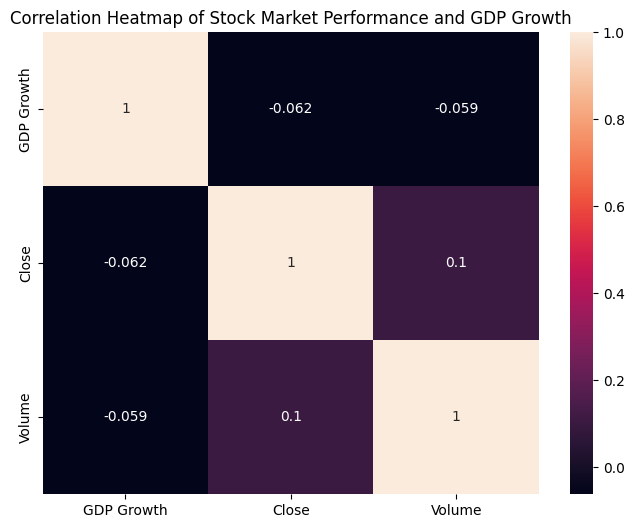

In [33]:
# #Visualization 1: Correlation heatmap

correlation_matrix = merged_data[['GDP Growth', 'Close', 'Volume']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap of Stock Market Performance and GDP Growth')
plt.show()

*Answer to research question:* While there is a negative correlation between the stock market closing price and volume with GDP growth, the overall stock market price does not show any significant impact from changes in GDP.

- Question 2: How does GDP growth in different countries influence the stock market performance of SPY?

In [34]:
#Visualization 2: Correlation of each country's GDP growth vs closeing price

# Initialize an empty dictionary to store correlation values
country_dic = {}

for country_code in merged_data['Country Code'].unique():  # Iterate over unique country codes
    filtered_data = merged_data[merged_data["Country Code"] == country_code]  # Filter data for the current country
    country_dic[country_code] = filtered_data['GDP Growth'].corr(filtered_data['Close'])  # Compute correlation

# Sort dictionary by correlation values in descending order
sorted_country_dic = dict(sorted(country_dic.items(), key=lambda item: item[1], reverse=True))

# Print sorted dictionary
print(sorted_country_dic)



{'GUY': 0.7331555659980221, 'CHI': 0.5142172051320064, 'CYM': 0.5018995788805631, 'CSS': 0.45461293591972063, 'BGD': 0.4492927514948433, 'BEN': 0.44865609234741977, 'COD': 0.44117582456767623, 'GIN': 0.370488676597385, 'KIR': 0.36223870676787084, 'TJK': 0.3484874830330594, 'MCO': 0.3233262585238508, 'SEN': 0.30235868867161586, 'CIV': 0.28971988264255855, 'ASM': 0.278838341770188, 'KEN': 0.2731712567035141, 'SMR': 0.2708022686680657, 'NRU': 0.26533966053393315, 'PYF': 0.25368244785276384, 'UZB': 0.23965120902168618, 'MLT': 0.21408252516509343, 'GMB': 0.1990940905163132, 'VIR': 0.19148490768121362, 'KGZ': 0.18883946114732297, 'MNE': 0.1876074641041551, 'NER': 0.1872730560448504, 'FRO': 0.18654741575632378, 'MNP': 0.17761000949666986, 'CYP': 0.17667680505637678, 'TKM': 0.1740931469800535, 'BDI': 0.17367601803287627, 'GEO': 0.1524064651681343, 'MDA': 0.14962799922876852, 'SLV': 0.14890734947769727, 'JAM': 0.1423819179736552, 'DNK': 0.1386711360617153, 'LCA': 0.13755412286346622, 'ECA': 0.1

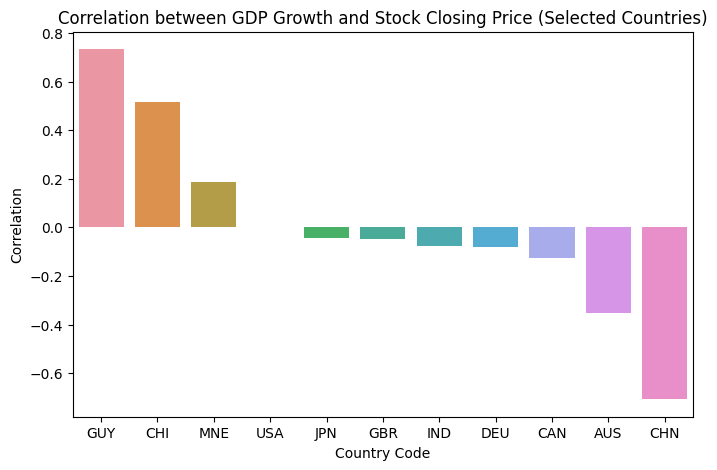

In [35]:
# Convert dictionary to sorted DataFrame
# list of main country codes
main_countries = ['USA', 'CHN', 'GBR', 'DEU', 'JPN', 'IND', 'AUS', 'CAN', 'GUY', 'CHI', 'MNE']

# Filter the DataFrame to include only these countries
correlation_df = pd.DataFrame(sorted_country_dic.items(), columns=['Country Code', 'Correlation'])
filtered_df = correlation_df[correlation_df['Country Code'].isin(main_countries)]

# Plot bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x='Country Code', y='Correlation', data=filtered_df)
plt.title('Correlation between GDP Growth and Stock Closing Price (Selected Countries)')
plt.xlabel('Country Code')
plt.ylabel('Correlation')
plt.show()



*Answer to research question: *
Countries such as GUY and CHI exhibit a strong positive correlation, indicating that economic growth has a significant impact on the stock market in these regions. On the other hand, countries like MNE and USA show a moderate correlation, suggesting a weaker relationship between economic growth and stock market performance. Lastly, countries including IND, CAN, AUS, and CHN display negative correlations, which implies that economic growth may not positively influence the stock market, 

### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

*Answer:* If I had more time to complete the project, I would expand the dataset by including additional stocks from various sectors to provide a more comprehensive analysis of market trends. Additionally, I would incorporate more macroeconomic indicators, such as the inflation rate, interest rates, and consumer confidence, to better understand their impact on stock market volatility.

A key research question I would explore is: How do additional macroeconomic factors, such as inflation and interest rates, influence the volatility of individual stocks across different sectors?